## Fake and Real News Dataset


# **<span style="color:#6daa9f;">IMPORT LIBRARY & PACKAGES </span>**


### Hi there!😄 I am new to data science and this is my try on the Fake and Real News dataset. Feel free to comment if you have any questions, insights or advice on this or any data science related :) Upvote if you find my work useful for you! Thank you!

In [1]:
#import package

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize,sent_tokenize
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **<span style="color:#6daa9f;">EXPLORATORY DATA ANALYSIS </span>**


In [2]:
# Reading from file 
fake = pd.read_csv('../input/fake-and-real-news-dataset/Fake.csv')
true = pd.read_csv('../input/fake-and-real-news-dataset/True.csv')

In [3]:
print(true.shape)
print(true.info())
true.head()

(21417, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
print(fake.shape)
print(fake.info())
fake.head()

(23481, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
fake['Label'] = 1
true['Label'] = 0

In [6]:
data = pd.concat([true,fake],axis=0,ignore_index=True)
print(data.shape)
data.head()

(44898, 5)


,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [7]:
data.describe()

,Label
count,44898.000000
mean,0.522985
std,0.499477
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
data['text']=data['title']+data['text']
data=data.drop(['title'], axis=1)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Label', ylabel='count'>

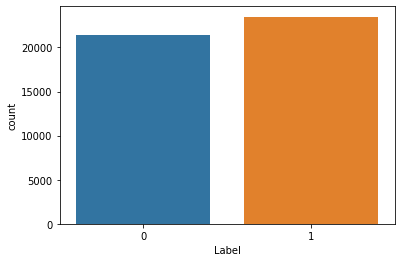

In [9]:
sns.countplot(data.Label)

In [10]:
data.isnull().sum()

text       0
subject    0
date       0
Label      0
dtype: int64

In [11]:
data.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

# **<span style="color:#6daa9f;">DATA CLEANING </span>**

**Lowercase words, remove the word 'Reuters', remove square brackets, links, words containing numbers and punctuations**

* Cleaning our text data is important so that the model wont be fed noises that would not help with the prediction. 
* The word reuters was removed as it always appear in the real news article therefore I removed it as it is an obvious indicator to the model 

In [12]:
def clean_text(text):
    
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('Reuters','',text)
    return text

data['text'] = data['text'].apply(lambda x:clean_text(x))


**Remove stop words**

In [13]:
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))



**Lemmatize words**

Words were lemmatized so that only root words are retain in the data and fed into the model 

In [14]:
def lemmatize_words(text):
    wnl = nltk.stem.WordNetLemmatizer()
    lem = ' '.join([wnl.lemmatize(word) for word in text.split()])    
    return lem

data['text'] = data['text'].apply(lemmatize_words)

**Split data into train and test set**

In [15]:
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(data['text'], y,test_size=0.33,random_state=53)

**Using Bag of words model for data transformation**

Since we are dealing with text data, we cannot fed it directly to our model. Therefore, I am using bag of words model to extract features from our text data and convert it into numerical feature vectors that can be fed directly to the algorithm

In [16]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)
print(count_train.shape)

(30081, 172639)


# **<span style="color:#6daa9f;">MODEL </span>**

Using 2 different model with different parameter for parameter investigation values of alpha and c

**Naive Bayes**

In [17]:
# Model 1 - default parameter 
from sklearn.metrics import classification_report

nb_classifier1 = MultinomialNB()
nb_classifier1.fit(count_train, y_train)

pred1 = nb_classifier1.predict(count_test)

print(classification_report(y_test, pred1, target_names = ['Fake','True']))

              precision    recall  f1-score   support

        Fake       0.95      0.96      0.95      7178
        True       0.96      0.95      0.96      7639

    accuracy                           0.96     14817
   macro avg       0.95      0.96      0.96     14817
weighted avg       0.96      0.96      0.96     14817



In [18]:
#model 2
nb_classifier2 = MultinomialNB(alpha = 1000)
nb_classifier2.fit(count_train, y_train)

pred2 = nb_classifier2.predict(count_test)

print(classification_report(y_test, pred2, target_names = ['Fake','True']))

              precision    recall  f1-score   support

        Fake       0.94      0.92      0.93      7178
        True       0.93      0.95      0.94      7639

    accuracy                           0.94     14817
   macro avg       0.94      0.94      0.94     14817
weighted avg       0.94      0.94      0.94     14817



**Support Vector Machine (SVM)**

In [19]:
# 1
from sklearn.svm import SVC

svc_model1 = SVC(C=1, kernel='linear', gamma= 1)
svc_model1.fit(count_train, y_train)

prediction1 = svc_model1.predict(count_test)

print(classification_report(y_test, prediction1, target_names = ['Fake','True']))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      7178
        True       0.99      0.99      0.99      7639

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817



In [20]:
# 2
svc_model2 = SVC(C= 100, kernel='linear', gamma= 1)
svc_model2.fit(count_train, y_train)

prediction2 = svc_model2.predict(count_test)

print(classification_report(y_test, prediction2, target_names = ['Fake','True']))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      7178
        True       0.99      0.99      0.99      7639

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817

